In [4]:
# ejercicios de grafos
import bct

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
mat_path = r"C:\Users\ANEL\OneDrive\Escritorio\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat"

In [6]:
mat_json = scipy.io.loadmat(mat_path)

In [7]:
mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dictmat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict

{'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484581, -5.09251101],
        [-4.53874539, 46.53874539,  3.06273063]])}

In [9]:
mat_dict.keys()

dict_keys(['Coactivation_matrix', 'Coord'])

In [10]:
import pandas as pd
import numpy as np

coactmat = mat_dict['Coactivation_matrix']

# Crear un dataframe con la información del ndarray de coativation_matrix, las columnas deben ser números desde el 1, los índices deben ser iguales a las columnas

df1 = pd.DataFrame(coactmat)
df1.index += 1
df1.columns = df1.index

# mostramos la información
df1.info(), df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 1 to 638
Columns: 638 entries, 1 to 638
dtypes: float64(638)
memory usage: 3.1 MB


(None,
         1         2         3         4         5    6         7         8    \
 1  0.000000  0.160714  0.111486  0.000000  0.138095  0.0  0.000000  0.000000   
 2  0.160714  0.000000  0.068259  0.000000  0.042056  0.0  0.000000  0.000000   
 3  0.111486  0.068259  0.000000  0.224199  0.000000  0.0  0.000000  0.052846   
 4  0.000000  0.000000  0.224199  0.000000  0.000000  0.0  0.039275  0.048035   
 5  0.138095  0.042056  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
 
    9         10   ...  629       630  631  632       633       634       635  \
 1  0.0  0.034351  ...  0.0  0.000000  0.0  0.0  0.157676  0.053872  0.049383   
 2  0.0  0.036585  ...  0.0  0.000000  0.0  0.0  0.119149  0.042105  0.000000   
 3  0.0  0.000000  ...  0.0  0.047035  0.0  0.0  0.000000  0.161905  0.103943   
 4  0.0  0.000000  ...  0.0  0.048673  0.0  0.0  0.000000  0.000000  0.075697   
 5  0.0  0.000000  ...  0.0  0.000000  0.0  0.0  0.066079  0.000000  0.000000   
 
         636     

Text(0.5, 1.0, 'Mapa de calor de Coactivation_matrix')

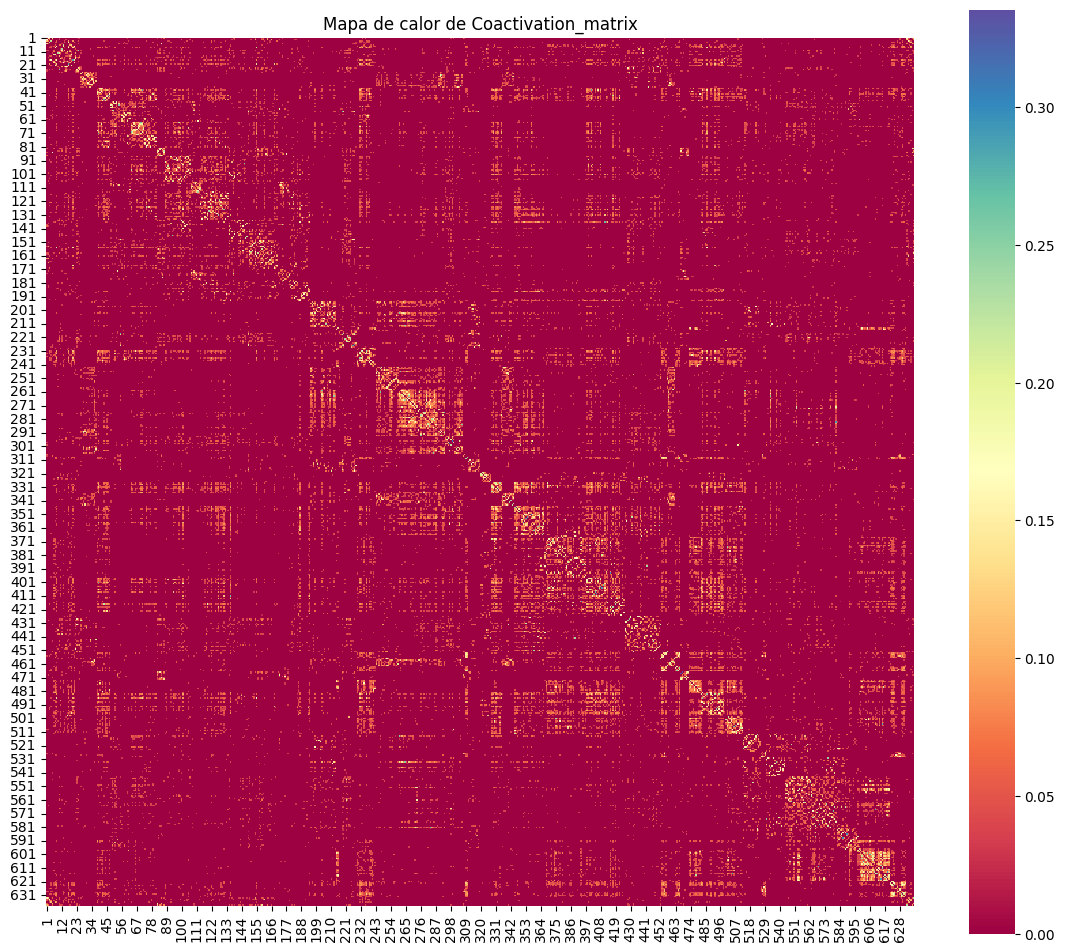

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#Hacemos el mapa de calor

plt.figure(figsize=(14, 12))
sns.heatmap(df1, cmap = 'Spectral', square = True, cbar= True)
plt.title("Mapa de calor de Coactivation_matrix")

Text(0.5, 1.0, 'Mapa de calor del subconjunto de Coactivation_matrix')

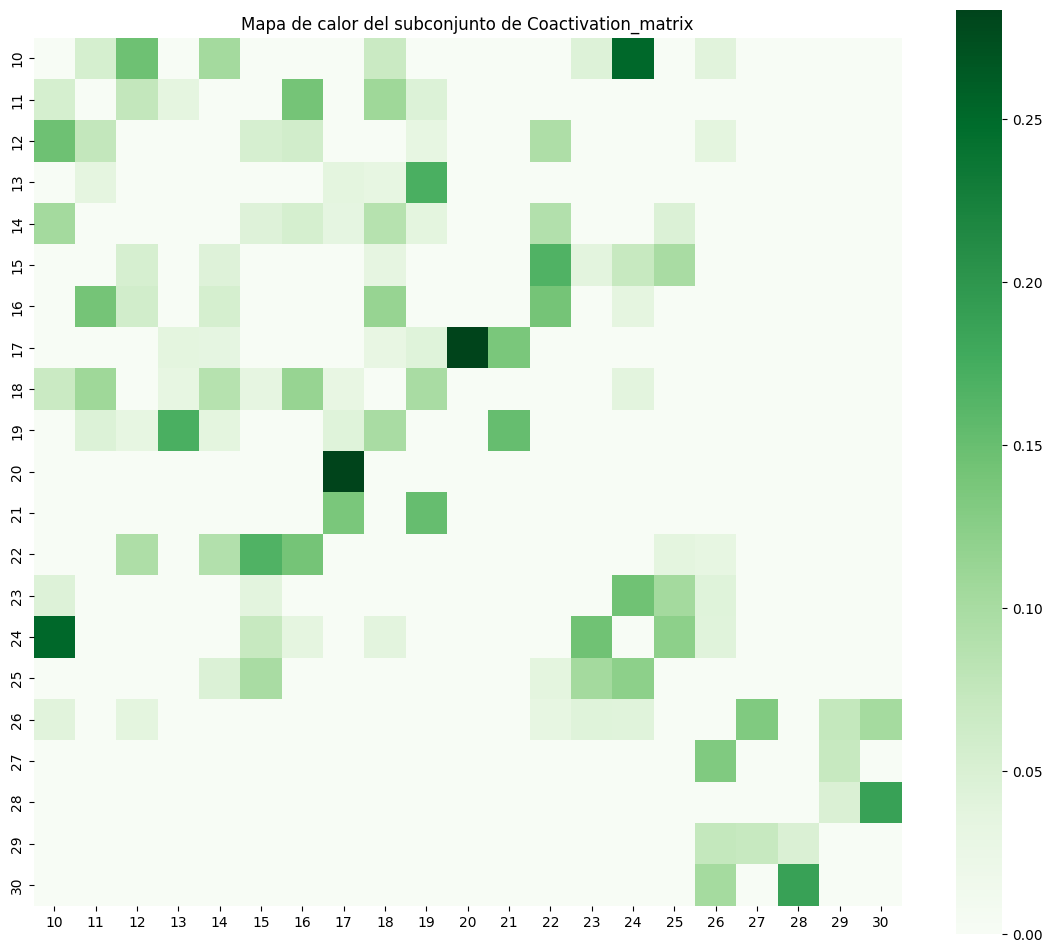

In [26]:
# creamos el subconjunto del dataframe que tiene filas y columnas desde la 10 hasta la 30

df2 = df1.loc[10:30, 10:30] # ya tenemos de la 10 hasta la 30 aquí, ahora va el mapa de calor

# mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(df2, cmap = 'Greens', square = True, cbar= True)
plt.title("Mapa de calor del subconjunto de Coactivation_matrix")

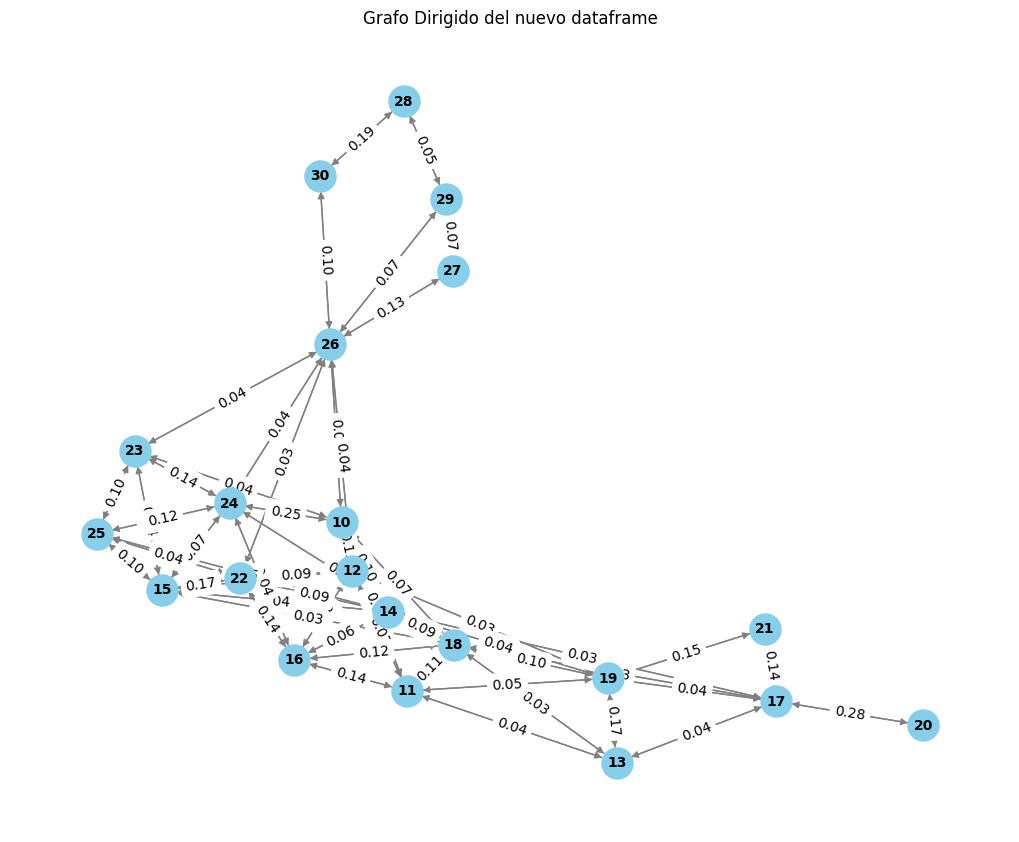

In [13]:
# Crear el grafo dirigido del nuevo dataframe
import networkx as nx
import matplotlib.pyplot as plt

edges = [(i, j, df2.loc[i, j]) for i in df2.index for j in df2.columns if df2.loc[i, j] > 0]

# Creamos el grafo dirigido
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Lo ploteamos
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout para una disposición visual adecuada
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f'{w:.2f}' for i, j, w in edges})
plt.title("Grafo Dirigido del nuevo dataframe")
plt.show()

In [14]:
# nodo con más conexiones

maxoutnod = max(G.out_degree(), key = lambda x: x[1]) # este es el nodo que saca más conexiones
maxinnod = max(G.in_degree(), key = lambda x: x[1]) # este es el nodo que recibe más conexiones

print("El nodo con más conexiones de entrada es: " , maxoutnod)
print("El nodo con más conexiones de salida es: " , maxinnod)

# es el mismo jejejjeje
# indica que es el nodo 18, con 9 conexiones

El nodo con más conexiones de entrada es:  (18, 9)
El nodo con más conexiones de salida es:  (18, 9)


In [15]:
# calcular los quantiles 0.25, 0.5, 0.75 de los valores de los datos (quantiles de las conexiones)

coactmat = mat_dict['Coactivation_matrix']
df3 = pd.DataFrame(coactmat)

# calcular los quantiles
quantiles = df3.stack().quantile([0.25, 0.5, 0.75])
print("Quantiles de la matriz: " , quantiles)

Quantiles de la matriz:  0.25    0.0
0.50    0.0
0.75    0.0
dtype: float64


In [17]:
# Filtre el dataframe usando como threshold los quantiles 0.25 y 0.5, cómo queda la matriz de activación filtrada?
import pandas as pd
import scipy.io as sio

q25 = df3.stack().quantile(0.25)
q5 = df3.stack().quantile(0.5)

# filtramos
filtro = df3[(df3 >= q25) & (df3 <= q5)]

print("Matriz filtrada con los quantiles 0.25 y 0.5: ")
print(filtro)

Matriz filtrada con los quantiles 0.25 y 0.5: 
     0    1    2    3    4    5    6    7    8    9    ...  628  629  630  \
0    0.0  NaN  NaN  0.0  NaN  0.0  0.0  0.0  0.0  NaN  ...  0.0  0.0  0.0   
1    NaN  0.0  NaN  0.0  NaN  0.0  0.0  0.0  0.0  NaN  ...  0.0  0.0  0.0   
2    NaN  NaN  0.0  NaN  0.0  0.0  0.0  NaN  0.0  0.0  ...  0.0  NaN  0.0   
3    0.0  0.0  NaN  0.0  0.0  0.0  NaN  NaN  0.0  0.0  ...  0.0  NaN  0.0   
4    NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
633  NaN  NaN  NaN  0.0  0.0  0.0  0.0  NaN  0.0  NaN  ...  0.0  NaN  0.0   
634  NaN  0.0  NaN  NaN  0.0  NaN  0.0  0.0  0.0  0.0  ...  0.0  NaN  0.0   
635  0.0  0.0  NaN  NaN  0.0  0.0  NaN  NaN  0.0  0.0  ...  0.0  NaN  0.0   
636  NaN  0.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  NaN  ...  0.0  0.0  0.0   
637  NaN  NaN  0.0  0.0  NaN  0.0  0.0  0.0  0.0  NaN  ...  0.0  0.0  0.0   

     631  632  633  634  635

In [62]:
# EJERCICO 2: fve32.mat

In [18]:
mat_path = r"C:\Users\ANEL\OneDrive\Escritorio\BCT\2019_03_03_BCT\data_and_demos\fve32.mat"

In [19]:
mat_json = scipy.io.loadmat(mat_path)

In [20]:
mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dictmat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict

{'Names': array(['  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t',
        '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv',
        'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP',
        ' LIP', ' VIP', ' MIP', ' MDP', '  DP', '  7a', ' FEF', '  46'],
       dtype='<U4'),
 'CIJ': array([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)}

In [21]:
mat_dict.keys()

dict_keys(['Names', 'CIJ'])

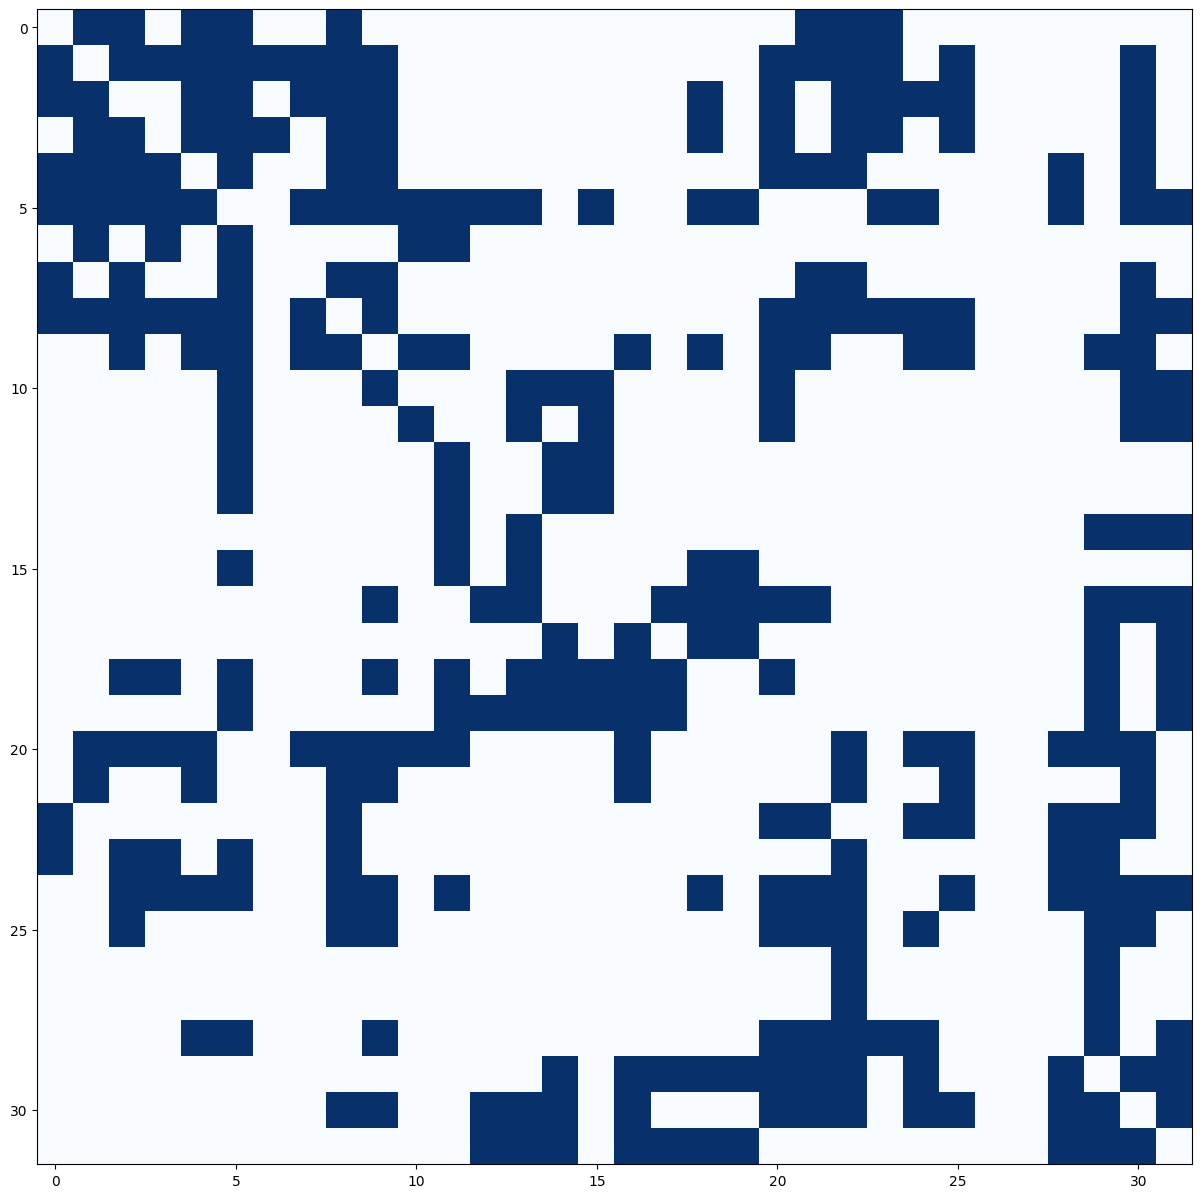

In [63]:
# mapa de calor de la matriz de activación

fig = plt.figure(figsize=(15, 15))

plt.imshow(mat_dict['CIJ'], cmap='Blues', interpolation='nearest')
plt.show()

In [27]:
import networkx as nx

In [28]:
G1 = nx.from_numpy_array(mat_dict['CIJ'])
G1.edges(data=True)

EdgeDataView([(0, 1, {'weight': 1}), (0, 2, {'weight': 1}), (0, 4, {'weight': 1}), (0, 5, {'weight': 1}), (0, 8, {'weight': 1}), (0, 21, {'weight': 1}), (0, 22, {'weight': 1}), (0, 23, {'weight': 1}), (0, 7, {'weight': 1}), (1, 2, {'weight': 1}), (1, 3, {'weight': 1}), (1, 4, {'weight': 1}), (1, 5, {'weight': 1}), (1, 6, {'weight': 1}), (1, 7, {'weight': 1}), (1, 8, {'weight': 1}), (1, 9, {'weight': 1}), (1, 20, {'weight': 1}), (1, 21, {'weight': 1}), (1, 22, {'weight': 1}), (1, 23, {'weight': 1}), (1, 25, {'weight': 1}), (1, 30, {'weight': 1}), (2, 4, {'weight': 1}), (2, 5, {'weight': 1}), (2, 7, {'weight': 1}), (2, 8, {'weight': 1}), (2, 9, {'weight': 1}), (2, 18, {'weight': 1}), (2, 20, {'weight': 1}), (2, 22, {'weight': 1}), (2, 23, {'weight': 1}), (2, 24, {'weight': 1}), (2, 25, {'weight': 1}), (2, 30, {'weight': 1}), (2, 3, {'weight': 1}), (3, 4, {'weight': 1}), (3, 5, {'weight': 1}), (3, 6, {'weight': 1}), (3, 8, {'weight': 1}), (3, 9, {'weight': 1}), (3, 18, {'weight': 1}), (3,

In [29]:
node_labels = {idx: mat_dict['Names'][idx] for idx in range(len(mat_dict['CIJ']))}
node_labels

{0: np.str_('  V1'),
 1: np.str_('  V2'),
 2: np.str_('  V3'),
 3: np.str_('  VP'),
 4: np.str_(' V3a'),
 5: np.str_('  V4'),
 6: np.str_(' VOT'),
 7: np.str_(' V4t'),
 8: np.str_('  MT'),
 9: np.str_(' FST'),
 10: np.str_('PITd'),
 11: np.str_('PITv'),
 12: np.str_('CITd'),
 13: np.str_('CITv'),
 14: np.str_('AITd'),
 15: np.str_('AITv'),
 16: np.str_('STPp'),
 17: np.str_('STPa'),
 18: np.str_('  TF'),
 19: np.str_('  TH'),
 20: np.str_('MSTd'),
 21: np.str_('MSTl'),
 22: np.str_('  PO'),
 23: np.str_(' PIP'),
 24: np.str_(' LIP'),
 25: np.str_(' VIP'),
 26: np.str_(' MIP'),
 27: np.str_(' MDP'),
 28: np.str_('  DP'),
 29: np.str_('  7a'),
 30: np.str_(' FEF'),
 31: np.str_('  46')}

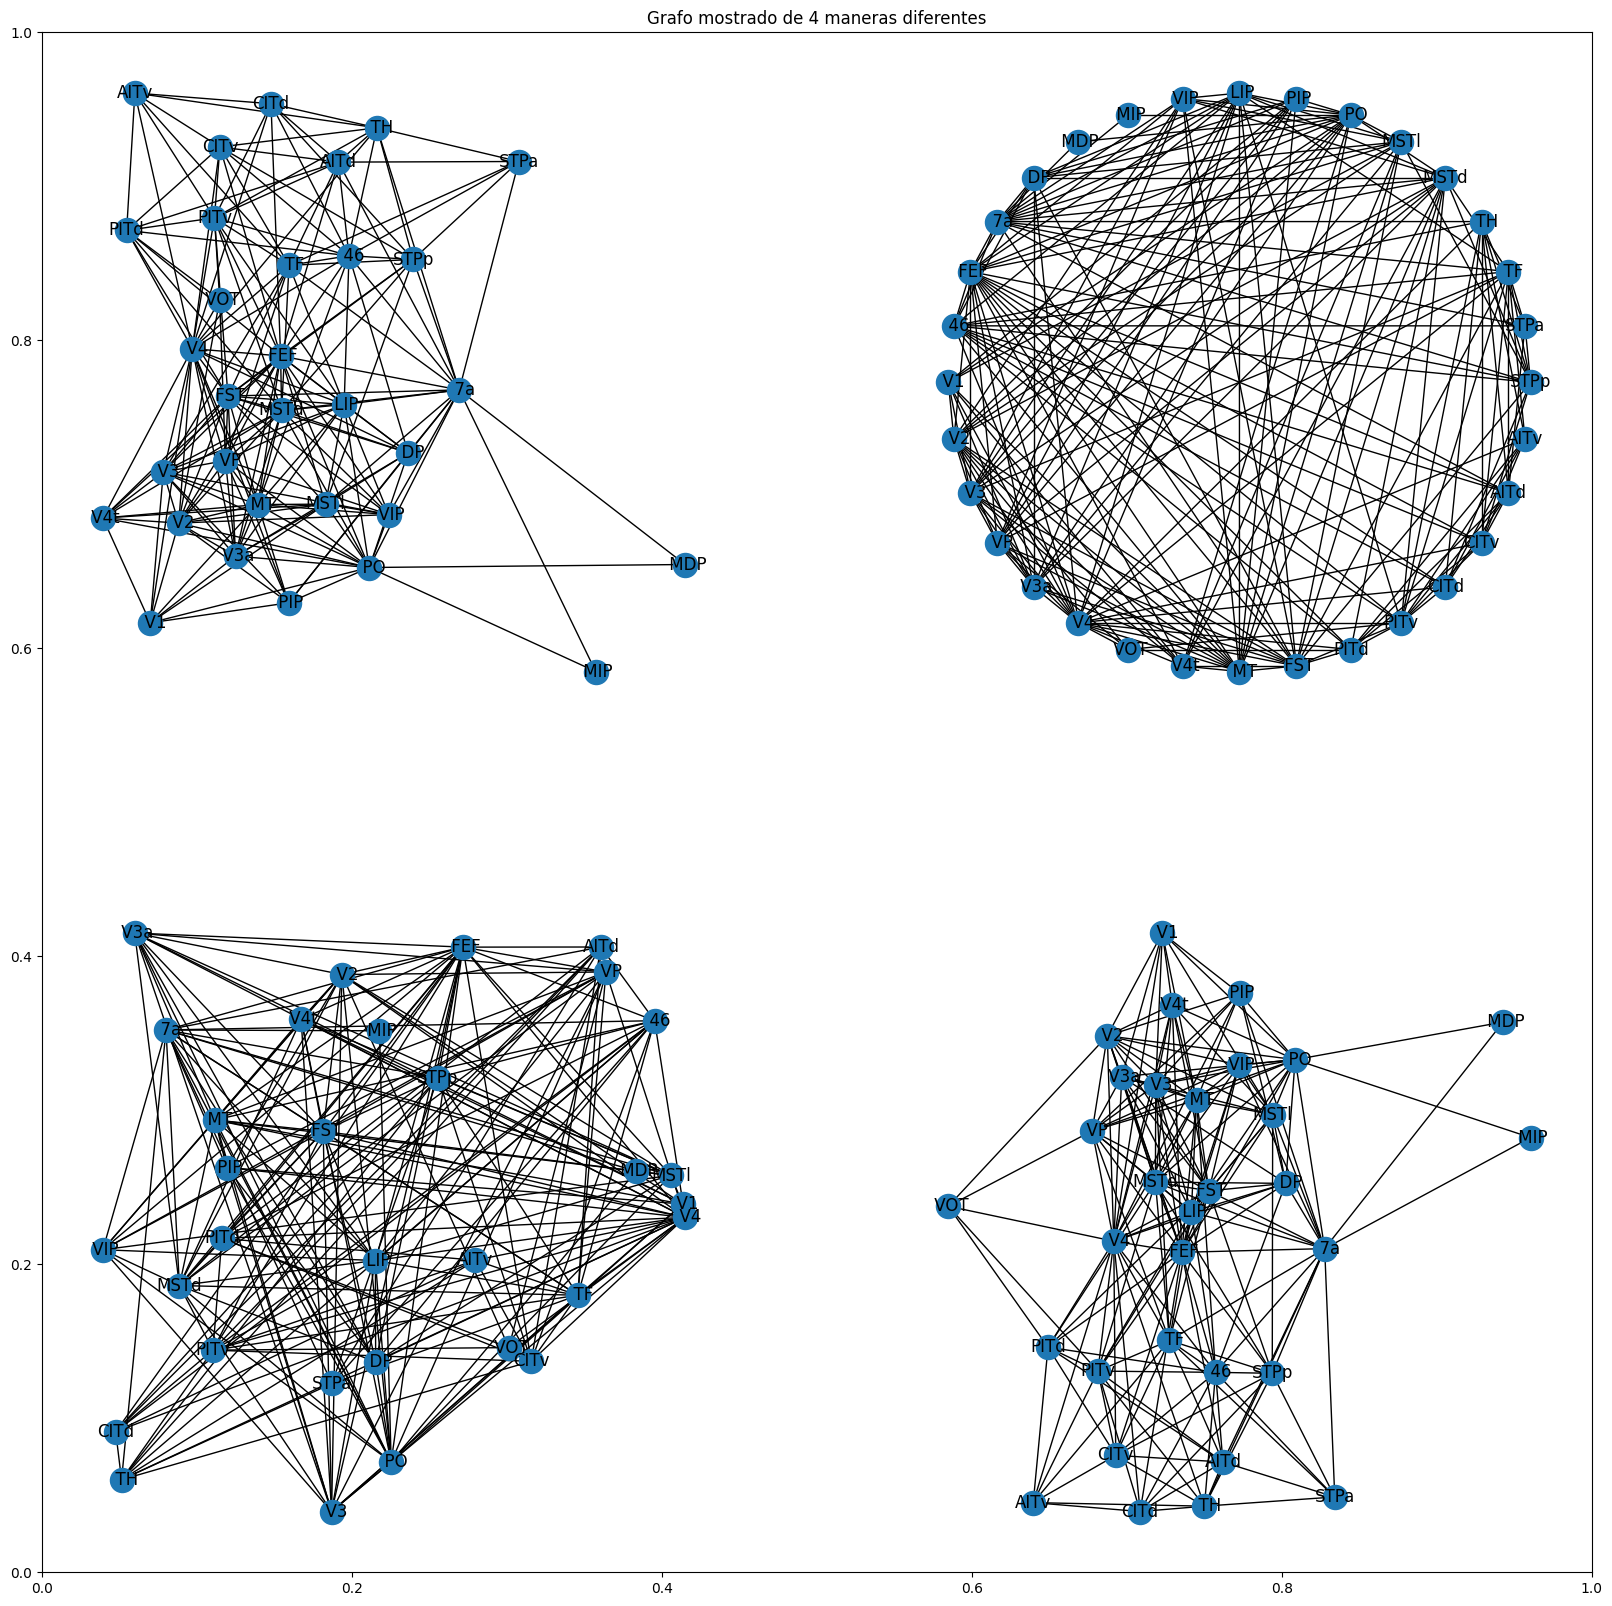

In [60]:
# mostramos el grafo de 4 maneras distintas

fig = plt.figure(figsize=(20, 20))
plt.title("Grafo mostrado de 4 maneras diferentes")

plt.subplot(2, 2, 1)
nx.draw(G1, labels=node_labels, with_labels=True, font_weight='regular')

# aquí está la forma SHELL
plt.subplot(2, 2, 2)
nx.draw_shell(G1, labels=node_labels, with_labels=True, font_weight='regular')

plt.subplot(2, 2, 3)
nx.draw_random(G1, labels=node_labels, with_labels=True, font_weight='regular')

plt.subplot(2, 2, 4)
nx.draw_spring(G1, labels=node_labels, with_labels=True, font_weight='regular')

In [57]:
# nodo con más conexiones
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt


nodomaximo = max(dict(G.degree), key=dict(G.degree).get)  # Esto debe ser un nombre único en cadena
print(f"Nodo con más conexiones: {nodomaximo}")

Nodo con más conexiones: 18


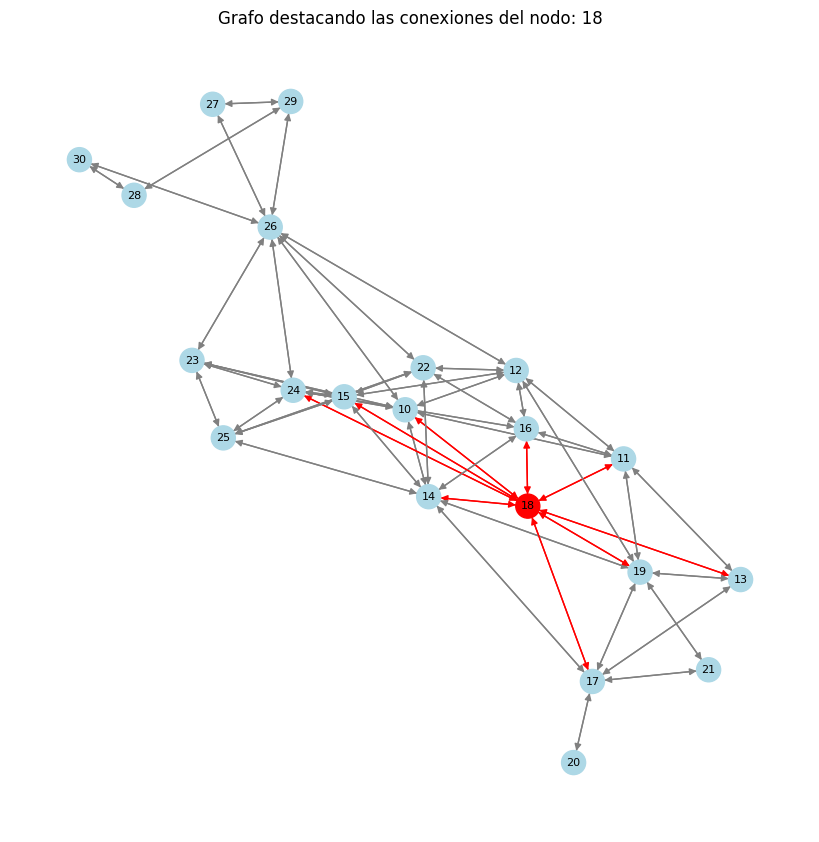

In [58]:
# quiero colorear el nodo con más conexiones

# aquí pongo rojo el nodo máximo y los demás azules
nodos = ["red" if node == nodomaximo else "lightblue" for node in G.nodes]

# aquí quiero que las líneas sean rojas también, las que no son del nodo máximo las pongo grises
lineas = ["red" if nodomaximo in edge else "gray" for edge in G.edges]

# Mostramos el grafo
plt.figure(figsize=(8, 8))
nx.draw_spring(G, with_labels=True, node_color=nodos, edge_color=lineas, font_size=8)
plt.title(f"Grafo destacando las conexiones del nodo: {nodomaximo}")
plt.show()

In [65]:
# EJERCICIO 3

# 1. Generar un número aleatorio entero en el rango [-3, 3] con seed = 5002
import numpy as np

# fijamos seed
np.random.seed(5002)
ej1 = np.random.randint(-3, 4)
print("El número entero aleatorio es: ", ej1)

El número entero aleatorio es:  -2


In [69]:
# 2. Generar un número aleatorio flotante en el rango [-10, 10] con seed=5002 
np.random.seed(5002)
ej2 = np.random.uniform(-10, 10)
print("El número flotante aleatorio es: ", ej2)

El número flotante aleatorio es:  2.355128268558648


In [74]:
# 3. Genera un array de 1000 números con distribución normal, con mu= ej1, y sigma= ej2 
# Crear el array con distribución normal

datos = np.random.normal(loc=ej1, scale=ej2, size=1000)

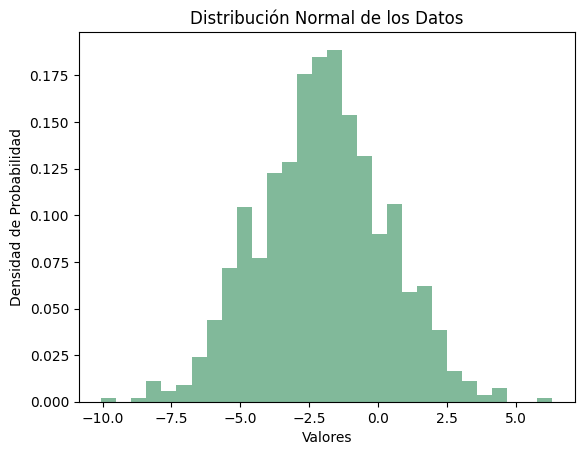

In [101]:
# 4. Plotea la distribución de los 1000 números
import matplotlib.pyplot as plt

# Ploteamos
plt.hist(datos, bins=30, density=True, alpha=0.6, color='seagreen')
plt.title("Distribución Normal de los Datos")
plt.xlabel("Valores")
plt.ylabel("Densidad de Probabilidad")
plt.show()

In [79]:
# 4.1 Calcular la media, STD y varianza

media= np.mean(datos)
STD = np.std(datos)
varianza = np.var(datos)

print("La media es: ", media)
print("La desviación estándar es: ", STD)
print("La varianza es: ", varianza)

La media es:  -2.020050475499066
La desviación estándar es:  2.3100521913290684
La varianza es:  5.33634112666423


In [82]:
# 5. Calcular los valores de 1sigma, 2sigma, 3sigma 

sigma1 = (media - STD, media + STD)
sigma2 = (media - 2*STD, media + 2*STD)
sigma3 = (media - 3*STD, media + 3*STD)

print("1 sigma:", sigma1)
print("2 sigma:", sigma2)
print("3 sigma:", sigma3)

1 sigma: (np.float64(-4.330102666828134), np.float64(0.29000171583000256))
2 sigma: (np.float64(-6.640154858157203), np.float64(2.600053907159071))
3 sigma: (np.float64(-8.95020704948627), np.float64(4.910106098488139))


In [84]:
# 6. Calcular el porcentaje de números que están en el rango [-1sigma, 1sigma] 

en1sigma = np.sum((data >= sigma1[0]) & (data <= sigma1[1])) / len(data) * 100
print("Porcentaje en ±1-sigma:", en1sigma)

Porcentaje en ±1-sigma: 67.4


In [86]:
# 7. Calcular el porcentaje de números que están en el rango [-2sigma, 2sigma] 

en2sigma = np.sum((data >= sigma2[0]) & (data <= sigma2[1])) / len(data) * 100
print("Porcentaje en ±2-sigma:", en2sigma)

Porcentaje en ±2-sigma: 95.5


In [88]:
# 8. Calcular el porcentaje de números que están en el rango [-3sigma, 3sigma] 

en3sigma = np.sum((data >= sigma3[0]) & (data <= sigma3[1])) / len(data) * 100
print("Porcentaje en ±3-sigma:", en3sigma)

Porcentaje en ±3-sigma: 99.7


In [104]:
# 9. Crear una función que reciba un entero (mu), un flotante (sigma) y un entero (total de números) y: genere array de números con distribución normal, con mu, y sigma. 

def distribucion(mu, sigma, total):
    # Generar el array con distribución normal
    dato = np.random.normal(loc=mu, scale=sigma, size=total)
    
    # Calcular estadísticos para la distribución normal
    media = np.mean(dato)
    STD = np.std(dato)
    varianza = np.var(dato)
    
    # Graficar la distribución
    plt.hist(dato, bins=30, density=True, alpha=0.6, color='yellowgreen')
    plt.title(f"Distribución Normal (mu={mu}, sigma={sigma}, total={total})")
    plt.xlabel("Valores")
    plt.ylabel("Densidad de Probabilidad")
    plt.show()
    
    # Calcular los valores de sigma
    sigma1 = (media - STD, media + STD)
    sigma2 = (media - 2*STD, media + 2*STD)
    sigma3 = (media - 3*STD, media + 3*STD)
    
    # Calcular el porcentaje en los rangos de sigma
    en1sigma = np.sum((dato >= sigma1[0]) & (dato <= sigma1[1])) / len(dato) * 100
    en2sigma = np.sum((dato >= sigma2[0]) & (dato <= sigma2[1])) / len(dato) * 100
    en3sigma = np.sum((dato >= sigma3[0]) & (dato <= sigma3[1])) / len(dato) * 100

    # Mostrar resultados
    print("La media es:", media)
    print("La desviación estándar es:", STD)
    print("La varianza es:", varianza)
    print("Porcentaje en ±1-sigma:", en1sigma)
    print("Porcentaje en ±2-sigma:", en2sigma)
    print("Porcentaje en ±3-sigma:", en3sigma)


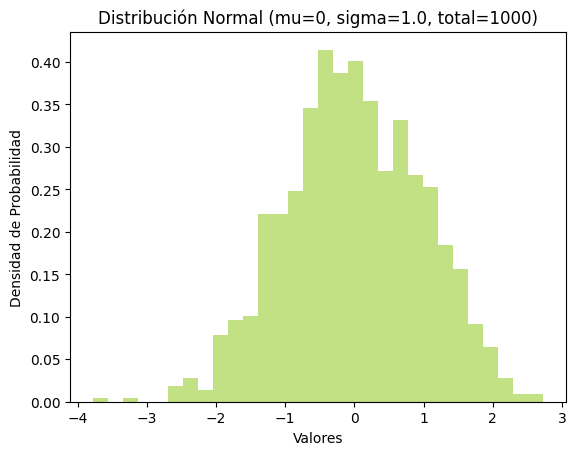

La media es: -0.002012181095866019
La desviación estándar es: 0.9880371952099152
La varianza es: 0.9762174991182759
Porcentaje en ±1-sigma: 66.0
Porcentaje en ±2-sigma: 96.5
Porcentaje en ±3-sigma: 99.8


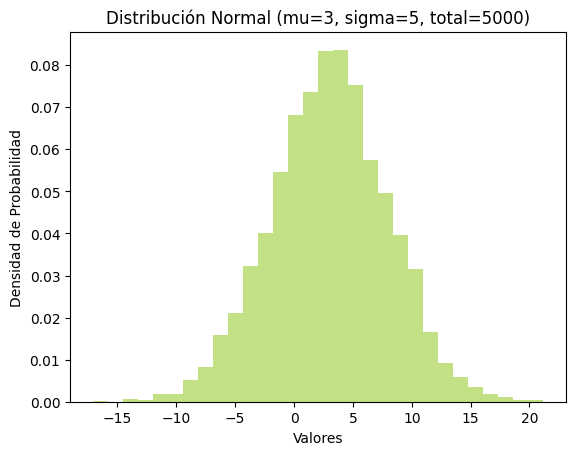

La media es: 3.02639421218005
La desviación estándar es: 4.957344449922515
La varianza es: 24.57526399517756
Porcentaje en ±1-sigma: 68.16
Porcentaje en ±2-sigma: 95.6
Porcentaje en ±3-sigma: 99.66000000000001


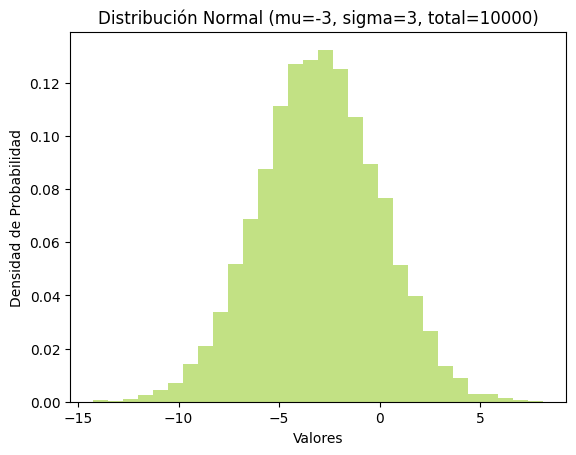

La media es: -3.0077049922082435
La desviación estándar es: 3.0034638499469093
La varianza es: 9.02079509793791
Porcentaje en ±1-sigma: 68.2
Porcentaje en ±2-sigma: 95.50999999999999
Porcentaje en ±3-sigma: 99.68


In [105]:
# 10. Usar la función anterior con los valores (0, 1., 1000), (3, 5, 5000), (-3, 3, 10000)

distribucion(0, 1., 1000)
distribucion(3, 5, 5000)
distribucion(-3, 3, 10000)